In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt

##load data

file_location="/Users/boxiao/Documents/yunjia/bittiger/Project two/"
file_name="Python_project_eda.csv"
mydata=pd.read_csv(file_location+file_name)

# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Exploratory data analysis (EDA)

In [2]:
mydata.shape

(566699, 15)

In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566699 entries, 0 to 566698
Data columns (total 15 columns):
buyer_week_before         566699 non-null int64
clicked_buy_before        495640 non-null float64
country                   554175 non-null object
existing_buyer            566699 non-null int64
initial_fop_set           566699 non-null bool
made_purchase_before      495640 non-null float64
saw_cart_before           495640 non-null float64
spend_usd_next_14_days    89032 non-null float64
user_added_credit_card    170597 non-null float64
user_added_dcb            170597 non-null float64
user_added_fop            566699 non-null int64
user_added_gift_card      170597 non-null float64
user_added_paypal         170597 non-null float64
user_id                   566699 non-null uint64
visit_before              566699 non-null int64
dtypes: bool(1), float64(8), int64(4), object(1), uint64(1)
memory usage: 61.1+ MB


In [4]:
mydata.head(10)

,buyer_week_before,clicked_buy_before,country,existing_buyer,initial_fop_set,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
0,0,0.0,IN,0,False,0.0,1.0,NaN,NaN,NaN,0,NaN,NaN,18321316048201303366,1
1,0,0.0,IN,0,False,0.0,1.0,NaN,NaN,NaN,0,NaN,NaN,13705367724816913241,1
2,0,NaN,IN,0,False,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,6605724765451655114,0
3,0,1.0,CA,1,True,1.0,1.0,7.398815,1.0,0.0,1,0.0,0.0,2340067911948261502,1
4,7,1.0,PL,1,True,1.0,1.0,NaN,0.0,1.0,1,0.0,0.0,11891045596810635427,1
5,0,0.0,ID,0,False,0.0,1.0,NaN,NaN,NaN,0,NaN,NaN,16960375743361213328,1
6,0,1.0,TH,0,True,1.0,1.0,NaN,0.0,1.0,1,0.0,0.0,14845700381773612658,1
7,0,0.0,ID,0,False,0.0,1.0,NaN,NaN,NaN,0,NaN,NaN,1407472760358057975,1
8,0,0.0,NaN,0,False,0.0,1.0,NaN,NaN,NaN,0,NaN,NaN,795175088989280187,1
9,0,0.0,GR,0,False,0.0,1.0,NaN,NaN,NaN,0,NaN,NaN,6034351615620544692,1


##### Deal with the missing value: 
#### Treat missing value as 0 exclued country. Treat missing value in country as 'unknown'

In [5]:
# exclued variable 'country'

In [6]:
data=mydata.drop('country',1).fillna(0)

In [7]:
country=mydata['country']
country.head(10)

0     IN
1     IN
2     IN
3     CA
4     PL
5     ID
6     TH
7     ID
8    NaN
9     GR
Name: country, dtype: object

In [8]:
country=country.fillna('unknown')
country.isnull().sum()

0

In [9]:
data.isnull().sum()

buyer_week_before         0
clicked_buy_before        0
existing_buyer            0
initial_fop_set           0
made_purchase_before      0
saw_cart_before           0
spend_usd_next_14_days    0
user_added_credit_card    0
user_added_dcb            0
user_added_fop            0
user_added_gift_card      0
user_added_paypal         0
user_id                   0
visit_before              0
dtype: int64

In [10]:
# merge both into one dataframe

In [11]:
data['country']=country
data.head(10)

,buyer_week_before,clicked_buy_before,existing_buyer,initial_fop_set,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before,country
0,0,0.0,0,False,0.0,1.0,0.000000,0.0,0.0,0,0.0,0.0,18321316048201303366,1,IN
1,0,0.0,0,False,0.0,1.0,0.000000,0.0,0.0,0,0.0,0.0,13705367724816913241,1,IN
2,0,0.0,0,False,0.0,0.0,0.000000,0.0,0.0,0,0.0,0.0,6605724765451655114,0,IN
3,0,1.0,1,True,1.0,1.0,7.398815,1.0,0.0,1,0.0,0.0,2340067911948261502,1,CA
4,7,1.0,1,True,1.0,1.0,0.000000,0.0,1.0,1,0.0,0.0,11891045596810635427,1,PL
5,0,0.0,0,False,0.0,1.0,0.000000,0.0,0.0,0,0.0,0.0,16960375743361213328,1,ID
6,0,1.0,0,True,1.0,1.0,0.000000,0.0,1.0,1,0.0,0.0,14845700381773612658,1,TH
7,0,0.0,0,False,0.0,1.0,0.000000,0.0,0.0,0,0.0,0.0,1407472760358057975,1,ID
8,0,0.0,0,False,0.0,1.0,0.000000,0.0,0.0,0,0.0,0.0,795175088989280187,1,unknown
9,0,0.0,0,False,0.0,1.0,0.000000,0.0,0.0,0,0.0,0.0,6034351615620544692,1,GR


In [12]:
data["country"].value_counts().sort_values(ascending =False).head(10)

IN    71023
US    66011
ID    39204
BR    36341
RU    23618
JP    18916
TR    17562
MX    15626
KR    13950
VN    13686
Name: country, dtype: int64

### Deal with outlier

#### Describe statistics

### creat new variables:convert 

In [13]:
data.head(5)

,buyer_week_before,clicked_buy_before,existing_buyer,initial_fop_set,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before,country
0,0,0.0,0,False,0.0,1.0,0.000000,0.0,0.0,0,0.0,0.0,18321316048201303366,1,IN
1,0,0.0,0,False,0.0,1.0,0.000000,0.0,0.0,0,0.0,0.0,13705367724816913241,1,IN
2,0,0.0,0,False,0.0,0.0,0.000000,0.0,0.0,0,0.0,0.0,6605724765451655114,0,IN
3,0,1.0,1,True,1.0,1.0,7.398815,1.0,0.0,1,0.0,0.0,2340067911948261502,1,CA
4,7,1.0,1,True,1.0,1.0,0.000000,0.0,1.0,1,0.0,0.0,11891045596810635427,1,PL


In [14]:
type(data["spend_usd_next_14_days"])

pandas.core.series.Series

In [15]:
data['convert']=[0 if value== 0 else 1 for value in data["spend_usd_next_14_days"]]  

In [16]:
data.head(5)

,buyer_week_before,clicked_buy_before,existing_buyer,initial_fop_set,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before,country,convert
0,0,0.0,0,False,0.0,1.0,0.000000,0.0,0.0,0,0.0,0.0,18321316048201303366,1,IN,0
1,0,0.0,0,False,0.0,1.0,0.000000,0.0,0.0,0,0.0,0.0,13705367724816913241,1,IN,0
2,0,0.0,0,False,0.0,0.0,0.000000,0.0,0.0,0,0.0,0.0,6605724765451655114,0,IN,0
3,0,1.0,1,True,1.0,1.0,7.398815,1.0,0.0,1,0.0,0.0,2340067911948261502,1,CA,1
4,7,1.0,1,True,1.0,1.0,0.000000,0.0,1.0,1,0.0,0.0,11891045596810635427,1,PL,0


In [17]:
### covert rate for different situations

In [18]:
def convert_rate(a,name):
    nconvert=data['convert'][a]
    n=nconvert.value_counts()
    a=float(n[1])
    b=float(n[0])
    name=round(a/(a+b),4)
    return name

In [19]:
# convert rate for no visit users
convert_rate_novisit=convert_rate((data.visit_before==0)&(data.saw_cart_before==0)&(data.clicked_buy_before==0),name='convert_rate_novisit')

# convert rate for no cart users
convert_rate_nocart=convert_rate((data.saw_cart_before==0)&(data.clicked_buy_before==0),name='onvert_rate_nocart')

# convert rate for saw cart but not clicked buy users
convert_rate_sawcart=convert_rate((data.saw_cart_before==1)&(data.clicked_buy_before==0),name='convert_rate_sawcart')

# convert rate for clicked buy users
convert_rate_click=convert_rate((data.visit_before==1)&(data.saw_cart_before==1)&(data.clicked_buy_before==1),name='convert_rate_click')

<Container object of 4 artists>

([<matplotlib.axis.XTick at 0x10e4fcb50>,
 <a list of 4 Text xticklabel objects>)

Text(0.5,1,u'Conversion')

Text(0,0.5,u'Conversion rate')

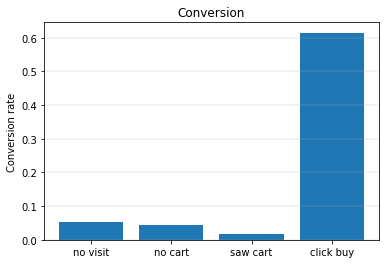

In [20]:
x=np.arange(4)
y=[convert_rate_novisit,convert_rate_nocart,convert_rate_sawcart, convert_rate_click]
fig, ax = plt.subplots()
plt.bar(x, y)
plt.xticks(x, ('no visit', 'no cart', 'saw cart', 'click buy'))
ax.set_title("Conversion")
ax.set_ylabel('Conversion rate')
ax.yaxis.grid(linestyle='-',linewidth=0.3)

plt.show()

In [21]:
def convert_rate0(initial,credit,dcb,paypal,gift):
    nconvert=data['convert'][(data.initial_fop_set==initial)&(data.user_added_credit_card==credit)&
             (data.user_added_dcb==dcb)&(data.user_added_paypal==paypal)&
             (data.user_added_gift_card==gift)]
    n=nconvert.value_counts()
    a=float(n[1])
    b=float(n[0])
    return round(a/(a+b),4)

In [22]:
data.head(5)

,buyer_week_before,clicked_buy_before,existing_buyer,initial_fop_set,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before,country,convert
0,0,0.0,0,False,0.0,1.0,0.000000,0.0,0.0,0,0.0,0.0,18321316048201303366,1,IN,0
1,0,0.0,0,False,0.0,1.0,0.000000,0.0,0.0,0,0.0,0.0,13705367724816913241,1,IN,0
2,0,0.0,0,False,0.0,0.0,0.000000,0.0,0.0,0,0.0,0.0,6605724765451655114,0,IN,0
3,0,1.0,1,True,1.0,1.0,7.398815,1.0,0.0,1,0.0,0.0,2340067911948261502,1,CA,1
4,7,1.0,1,True,1.0,1.0,0.000000,0.0,1.0,1,0.0,0.0,11891045596810635427,1,PL,0


In [23]:
convert_creditcard0=convert_rate0(True,1,0,0,0)
convert_dcb0=convert_rate0(True,0,1,0,0)
convert_paypal0=convert_rate0(True,0,0,1,0)
convert_giftcard0=convert_rate0(True,0,0,0,1)
print (convert_creditcard0,convert_dcb0,convert_paypal0, convert_giftcard0)

(0.4599, 0.3906, 0.4247, 0.4454)


In [24]:
# each payment with gift card
convert_creditgift0=convert_rate0(True,1,0,0,1)
convert_dcbgift0=convert_rate0(True,0,1,0,1)
convert_paypalgift0=convert_rate0(True,0,0,1,1)

print (convert_creditgift0,convert_dcbgift0,convert_paypalgift0)

(0.6791, 0.8238, 0.6203)


[Text(0,0,u'0.0%'),
 Text(0,0,u'10.0%'),
 Text(0,0,u'20.0%'),
 Text(0,0,u'30.0%'),
 Text(0,0,u'40.0%'),
 Text(0,0,u'50.0%'),
 Text(0,0,u'60.0%'),
 Text(0,0,u'70.0%'),
 Text(0,0,u'80.0%'),
 Text(0,0,u'90.0%')]

Text(0,0.5,u'Conversion')

[Text(0,0,u'Credit card'),
 Text(0,0,u'Direct carrier billing'),
 Text(0,0,u'PayPal'),
 Text(0,0,u'Gift card')]

Text(0.5,1,u'Conversion')

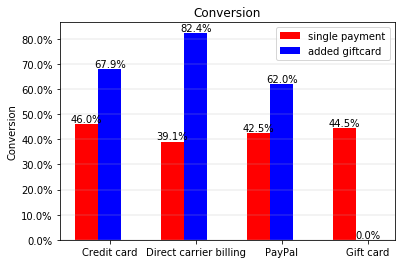

In [25]:
# plot
ind=np.arange(4)
width=0.27

fig =plt.figure()
ax=fig.add_subplot(111)


yvals=[convert_creditcard0,convert_dcb0,convert_paypal0, convert_giftcard0]
rect1=ax.bar(ind,yvals,width,color='r')
zvals=[convert_creditgift0,convert_dcbgift0,convert_paypalgift0,0]
rect2=ax.bar(ind+width*1,zvals,width,color='b')

vals=ax.get_yticks()
ax.set_yticklabels(['{:.1%}'.format(x) for x in vals])
ax.set_ylabel('Conversion')
ax.set_xticks(ind+width)
ax.set_xticklabels(('Credit card', 'Direct carrier billing', 'PayPal', 'Gift card'))

ax.yaxis.grid(linestyle='-',linewidth=0.3)

ax.legend((rect1[0],rect2[0]),('single payment','added giftcard'))
ax.set_title("Conversion")

def autolabel(rects):
    for rect in rects:
        h=rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2.,h,'{:.1%}'.format(h),ha='center',va='bottom')                   
                   
autolabel(rect1)
autolabel(rect2)

plt.show() 


In [26]:
## Average spend for different payment
def ave_spend(initial,credit,dcb,paypal,gift):
    nave=round(data['spend_usd_next_14_days'][(data.initial_fop_set==initial)&(data.user_added_credit_card==credit)&
             (data.user_added_dcb==dcb)&(data.user_added_paypal==paypal)&
             (data.user_added_gift_card==gift)].mean(),2)
   
    return nave

In [27]:

ave_creditcard=ave_spend(True,1,0,0,0)
ave_dcb=ave_spend(True,0,1,0,0)
ave_paypal=ave_spend(True,0,0,1,0)
ave_giftcard=ave_spend(True,0,0,0,1)

print (ave_creditcard,ave_dcb,ave_paypal,ave_giftcard)

(27.46, 14.35, 18.53, 20.9)


In [28]:
 # average spend for one payment added giftcard
ave_creditgift=ave_spend(True,1,0,0,1)
ave_dcbgift=ave_spend(True,0,1,0,1)
ave_paypalgift=ave_spend(True,0,0,1,1)


print (ave_creditgift,ave_dcbgift,ave_paypalgift)

(54.31, 100.18, 33.49)


Text(0.5,1,u'Average Spend')

Text(0,0.5,u'Average spend')

[Text(0,0,u'Credit card'),
 Text(0,0,u'Direct carrier billing'),
 Text(0,0,u'PayPal'),
 Text(0,0,u'Gift card')]

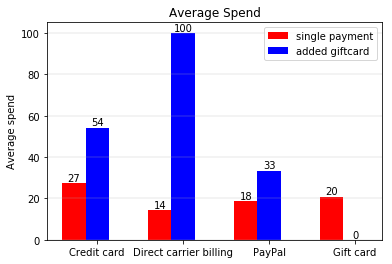

In [29]:
#plot
# plot
ind=np.arange(4)
width=0.27

fig =plt.figure()
ax=fig.add_subplot(111)


yvals=[ave_creditcard,ave_dcb,ave_paypal,ave_giftcard]
rect1=ax.bar(ind,yvals,width,color='r')
zvals=[ave_creditgift,ave_dcbgift,ave_paypalgift,0]
rect2=ax.bar(ind+width*1,zvals,width,color='b')

ax.set_title("Average Spend")
ax.set_ylabel('Average spend')
ax.set_xticks(ind+width)
ax.set_xticklabels(('Credit card', 'Direct carrier billing', 'PayPal', 'Gift card'))

ax.yaxis.grid(linestyle='-',linewidth=0.3)

ax.legend((rect1[0],rect2[0]),('single payment','added giftcard'))

def autolabel(rects):
    for rect in rects:
        h=rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2.,1*h,'%d'%h,ha='center',va='bottom')                   
                   
autolabel(rect1)
autolabel(rect2)

plt.show() 

In [30]:
#### for some special countries

In [31]:
data["country"].value_counts().sort_values(ascending =False).head(10)

IN    71023
US    66011
ID    39204
BR    36341
RU    23618
JP    18916
TR    17562
MX    15626
KR    13950
VN    13686
Name: country, dtype: int64

In [32]:
type(data.country)

pandas.core.series.Series

In [33]:
# Let's see two countries which has most values: IN and US

In [34]:
def convert_rate(initial,credit,dcb,paypal,gift,country1,country2):
    nconvert=data['convert'][(data.initial_fop_set==initial)&(data.user_added_credit_card==credit)&
             (data.user_added_dcb==dcb)&(data.user_added_paypal==paypal)&
             (data.user_added_gift_card==gift)&((data.country==country1)|(data.country==country2))]
    n=nconvert.value_counts()
    a=float(n[1])
    b=float(n[0])
    return round(a/(a+b),4)
     

In [35]:
# for IN and US:
convert_creditcard=convert_rate(True,1,0,0,0,'IN','US')
convert_dcb=convert_rate(True,0,1,0,0,'IN','US')
convert_paypal=convert_rate(True,0,0,1,0,'IN','US')
convert_giftcard=convert_rate(True,0,0,0,1,'IN','US')
print (convert_creditcard,convert_dcb,convert_paypal,convert_giftcard)

convert_creditgift=convert_rate(True,1,0,0,1,'IN','US')
convert_dcbgift=convert_rate(True,0,1,0,1,'IN','US')
convert_paypalgift=convert_rate(True,0,0,1,1,'IN','US')
print (convert_creditgift,convert_dcbgift,convert_paypalgift)


(0.4778, 0.2254, 0.4108, 0.3631)
(0.6735, 0.4941, 0.6119)


[Text(0,0,u'0.0%'),
 Text(0,0,u'10.0%'),
 Text(0,0,u'20.0%'),
 Text(0,0,u'30.0%'),
 Text(0,0,u'40.0%'),
 Text(0,0,u'50.0%'),
 Text(0,0,u'60.0%'),
 Text(0,0,u'70.0%'),
 Text(0,0,u'80.0%')]

Text(0,0.5,u'Conversion for country IN and US')

[Text(0,0,u'Credit card'),
 Text(0,0,u'Direct carrier billing'),
 Text(0,0,u'PayPal'),
 Text(0,0,u'Gift card')]

Text(0.5,1,u'Conversion')

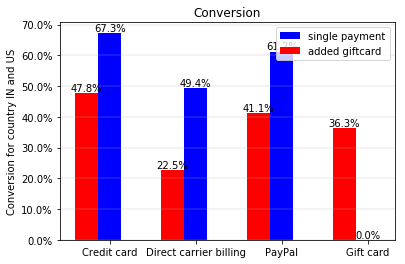

In [36]:
# plot
ind=np.arange(4)
width=0.27

fig =plt.figure()
ax=fig.add_subplot(111)

zvals=[convert_creditgift,convert_dcbgift,convert_paypalgift,0]
rect2=ax.bar(ind+width*1,zvals,width,color='b')
yvals=[convert_creditcard,convert_dcb,convert_paypal,convert_giftcard]
rect1=ax.bar(ind,yvals,width,color='r')


vals=ax.get_yticks()
ax.set_yticklabels(['{:.1%}'.format(x) for x in vals])
ax.set_ylabel('Conversion for country IN and US')
ax.set_xticks(ind+width)
ax.set_xticklabels(('Credit card', 'Direct carrier billing', 'PayPal', 'Gift card'))

ax.yaxis.grid(linestyle='-',linewidth=0.3)

ax.legend((rect2[0],rect1[0]),('single payment','added giftcard'))
plt.legend(alpha=0.1)
ax.set_title("Conversion")

def autolabel(rects):
    for rect in rects:
        h=rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2.,h,'{:.1%}'.format(h),ha='center',va='bottom')                   
                   
autolabel(rect1)
autolabel(rect2)

plt.show()

In [37]:
# only to consider US

In [38]:
def convert_rate(initial,credit,dcb,paypal,gift,country1):
    nconvert=data['convert'][(data.initial_fop_set==initial)&(data.user_added_credit_card==credit)&
             (data.user_added_dcb==dcb)&(data.user_added_paypal==paypal)&
             (data.user_added_gift_card==gift)&(data.country==country1)]
    n=nconvert.value_counts()
    a=float(n[1])
    b=float(n[0])
    return round(a/(a+b),4)
     

In [39]:
# for IN and US:
convert_creditcard1=convert_rate(True,1,0,0,0,'US')
convert_dcb1=convert_rate(True,0,1,0,0,'US')
convert_paypal1=convert_rate(True,0,0,1,0,'US')
convert_giftcard1=convert_rate(True,0,0,0,1,'US')
print (convert_creditcard1,convert_dcb1,convert_paypal1,convert_giftcard1)

convert_creditgift1=convert_rate(True,1,0,0,1,'US')
convert_dcbgift1=convert_rate(True,0,1,0,1,'US')
convert_paypalgift1=convert_rate(True,0,0,1,1,'US')
print (convert_creditgift1,convert_dcbgift1,convert_paypalgift1)

(0.4939, 0.2329, 0.4113, 0.3596)
(0.6749, 0.4908, 0.6119)


[Text(0,0,u'0.0%'),
 Text(0,0,u'10.0%'),
 Text(0,0,u'20.0%'),
 Text(0,0,u'30.0%'),
 Text(0,0,u'40.0%'),
 Text(0,0,u'50.0%'),
 Text(0,0,u'60.0%'),
 Text(0,0,u'70.0%'),
 Text(0,0,u'80.0%')]

Text(0,0.5,u'Conversion for country IN and US')

[Text(0,0,u'Credit card'),
 Text(0,0,u'Direct carrier billing'),
 Text(0,0,u'PayPal'),
 Text(0,0,u'Gift card')]

Text(0.5,1,u'Conversion')

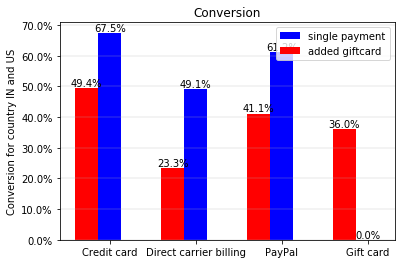

In [40]:
# plot

ind=np.arange(4)
width=0.27

fig =plt.figure()
ax=fig.add_subplot(111)

zvals=[convert_creditgift1,convert_dcbgift1,convert_paypalgift1,0]
rect2=ax.bar(ind+width*1,zvals,width,color='b')
yvals=[convert_creditcard1,convert_dcb1,convert_paypal1,convert_giftcard1]
rect1=ax.bar(ind,yvals,width,color='r')


vals=ax.get_yticks()
ax.set_yticklabels(['{:.1%}'.format(x) for x in vals])
ax.set_ylabel('Conversion for country IN and US')
ax.set_xticks(ind+width)
ax.set_xticklabels(('Credit card', 'Direct carrier billing', 'PayPal', 'Gift card'))

ax.yaxis.grid(linestyle='-',linewidth=0.3)

ax.legend((rect2[0],rect1[0]),('single payment','added giftcard'))
plt.legend(alpha=0.1)
ax.set_title("Conversion")

def autolabel(rects):
    for rect in rects:
        h=rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2.,h,'{:.1%}'.format(h),ha='center',va='bottom')                   

autolabel(rect1)
autolabel(rect2)

plt.show()